# Churn Rate Visual Exploration and Trends

In [7]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Load Data

In [8]:
# Load data
df = pd.read_csv('data/data_with_churn.csv')
# show column names
df.columns.tolist()

['Unnamed: 0.1',
 'Unnamed: 0',
 'contract_item_cancellation_status_code',
 'contract_item_customer_contract_life_cycle_status_code',
 'contract_item_description',
 'contract_item_internal_id',
 'contract_item_product_category',
 'contract_item_product_description',
 'contract_item_support_end_date',
 'contract_item_support_start_date',
 'contract_item_validity_status_code',
 'contract_item_concurrent_sessions',
 'description',
 'end_date_time',
 'start_date_time',
 'item_count',
 'item_list_cancellation_status_code',
 'item_list_customer_contract_life_cycle_status_code',
 'item_list_validity_status_code',
 'contract_label',
 'customer_earliest_start',
 'customer_latest_end',
 'customer_label',
 'sla',
 'product_category',
 'service_level_regex',
 'otrs_version',
 'system_type',
 'feature_add_ons',
 'cancellation_date',
 'customer_country',
 'concat_volume',
 'concat_currency',
 'cancellation_date_orca',
 'end_customer_id',
 'contract_item_logical_error',
 'item_list_logical_error',
 '

## Distribution

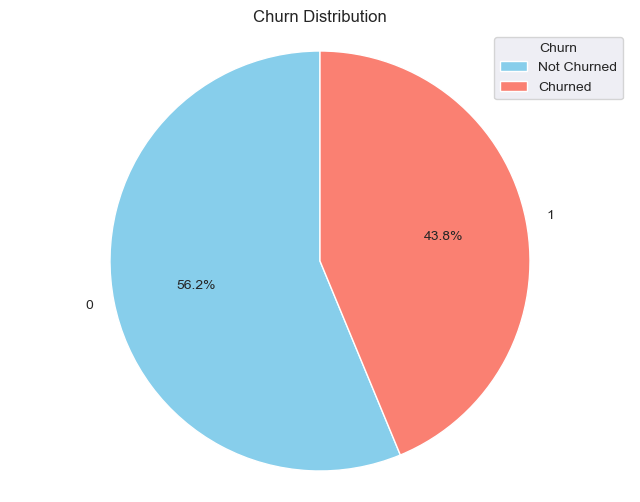

In [9]:
# Plot: Pie chart or bar plot of churn (churn column)
churn_counts = df['churn'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.axis('equal')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

## Correlation


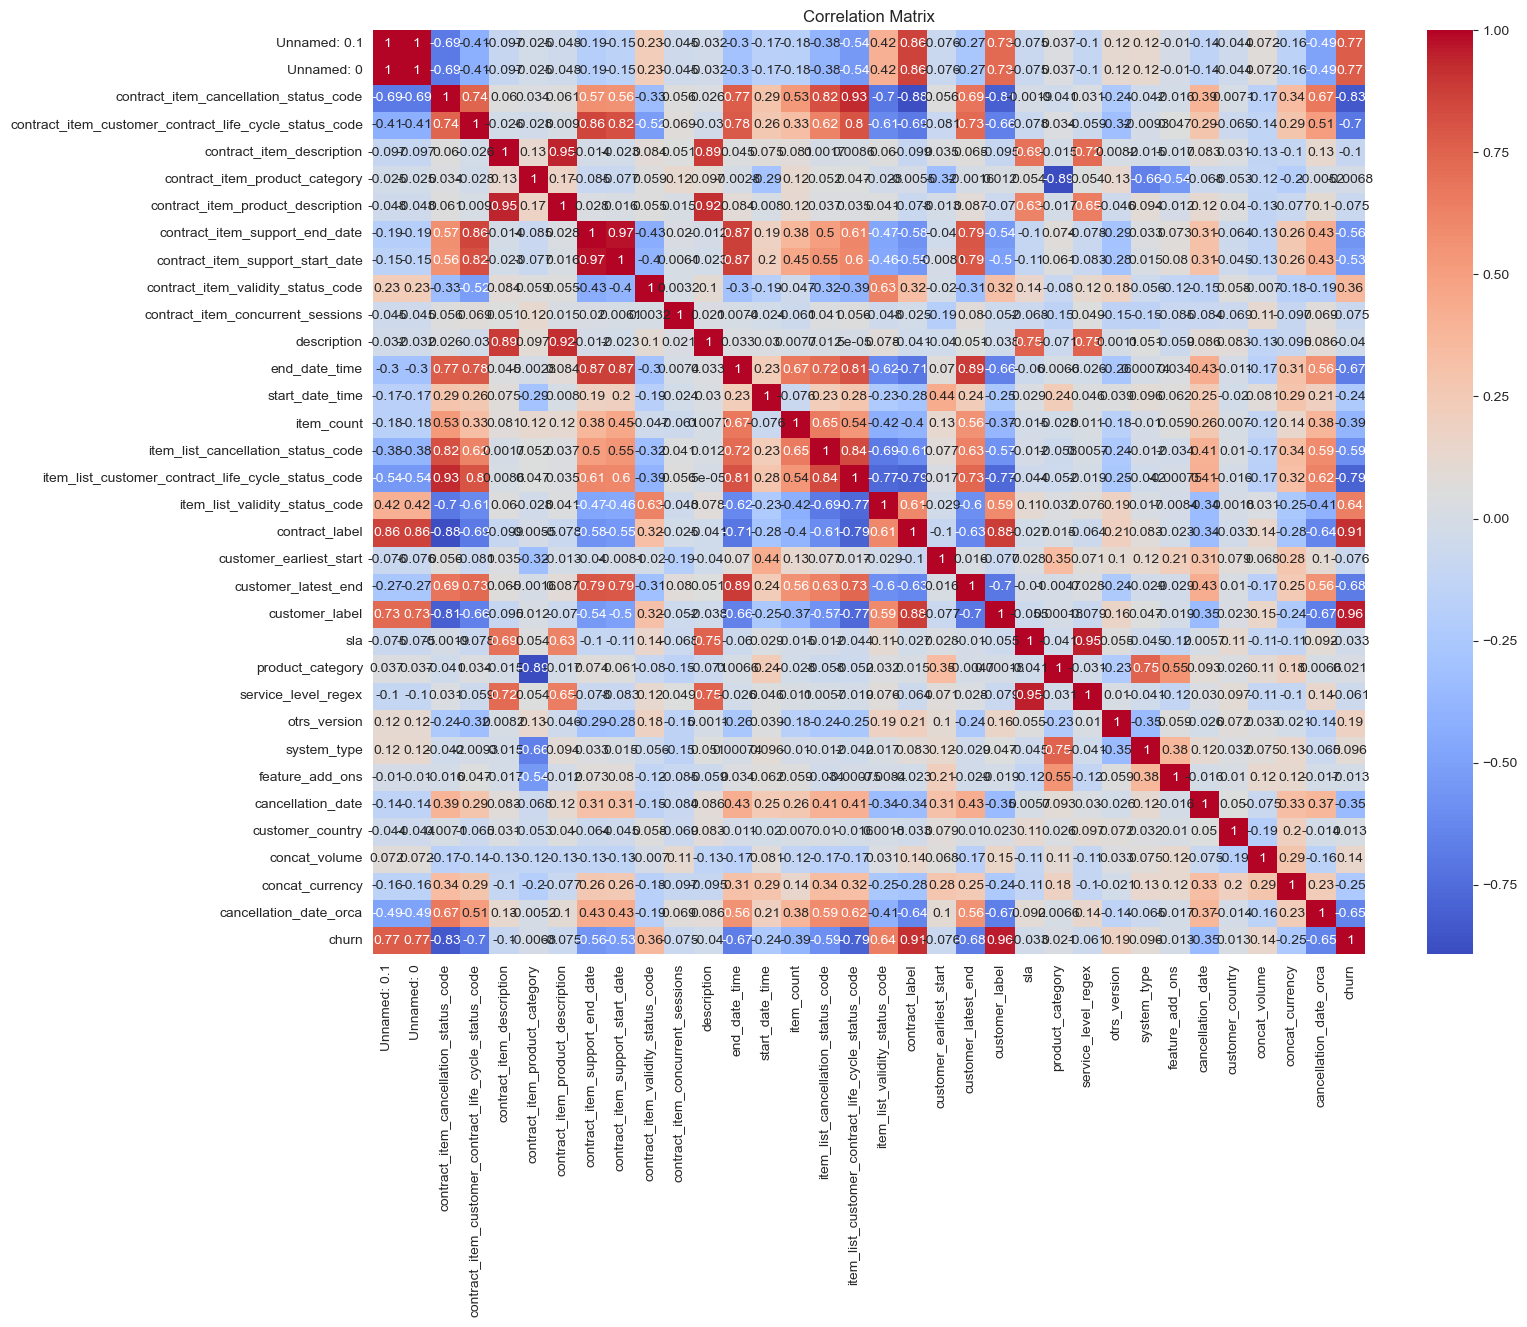

In [10]:
# Convert all object-type columns to numeric using label encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Drop datetime and category columns
df_encoded = df_encoded.select_dtypes(exclude=['datetime64[ns]', 'category'])

# drop specific columns
df_encoded = df_encoded.drop(columns=['contract_item_logical_error', 'item_list_logical_error', 'customer_logical_error', 'date_logical_error', 'logical_error', 'end_customer_id', 'contract_item_internal_id'])

# Calculate and plot correlation matrix
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Box Plots

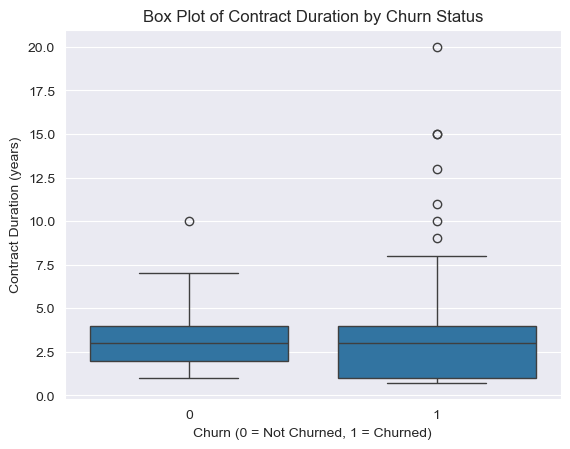

In [11]:
# Box plot grouped by churn status for a numerical column, e.g., 'contract_duration'
contract_duration = pd.to_datetime(df['end_date_time']) - pd.to_datetime(df['start_date_time'])
sns.boxplot(data=df, x='churn', y=contract_duration.dt.days / 365)
plt.title('Box Plot of Contract Duration by Churn Status')
plt.xlabel('Churn (0 = Not Churned, 1 = Churned)')
plt.ylabel('Contract Duration (years)')
plt.show()

* Central Tendency: The median contract duration for both churned and non-churned groups appears similar, indicating that the middle contract durations for both groups do not differ significantly.

* Spread/Variability: The distribution for churned customers shows a slightly wider spread in contract duration compared to non-churned customers. This suggests more variability among churned customers.

* Outliers: There are more extreme outliers in the churned group, indicating some customers have notably longer contract durations. These outliers might be worth further investigation to understand their impact on churn behavior.

* Potential Implications: The similarity in medians might indicate that, on average, contract duration alone does not strongly differentiate churned vs. non-churned customers. However, the higher variability and outliers among churned customers may point to segments that exhibit different behaviors.

## Bar Plots

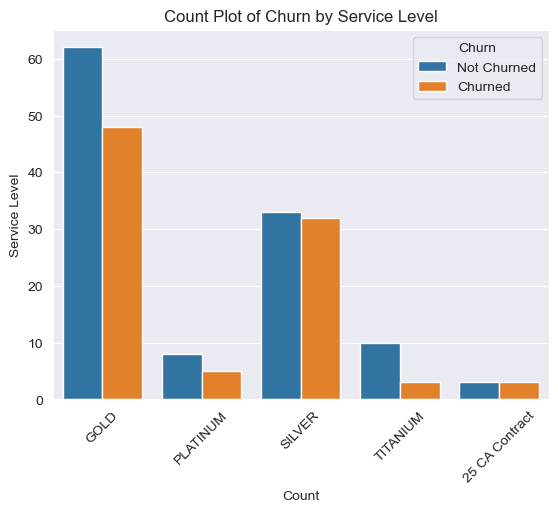

In [12]:
# count plot grouped by churn status for service level
sns.countplot(data=df, x='sla', hue='churn')
plt.title('Count Plot of Churn by Service Level')
plt.xlabel('Count')
plt.ylabel('Service Level')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

**Gold Level:**

Gold has the highest number of customers overall.
The number of churned customers (churn = 1) is relatively high but slightly less than the non-churned customers (churn = 0).

**Silver Level:**

Silver has a moderate number of customers.
Churned and non-churned customers are almost equal, suggesting a balanced churn rate.

**Platinum Level:**

Platinum has the lowest customer base among the service levels.
The number of churned customers is significantly lower than the non-churned customers, indicating lower churn.

**Titanium Level:**

Titanium also has a small customer base, slightly larger than Platinum.
It has fewer churned customers compared to non-churned customers, indicating better retention.

**General Observations:**

Gold and Silver have a higher churn risk compared to the other levels, possibly due to the larger customer base or specific factors driving churn in these groups.
Platinum and Titanium customers exhibit better retention, possibly due to the nature of the service or loyalty at these levels.

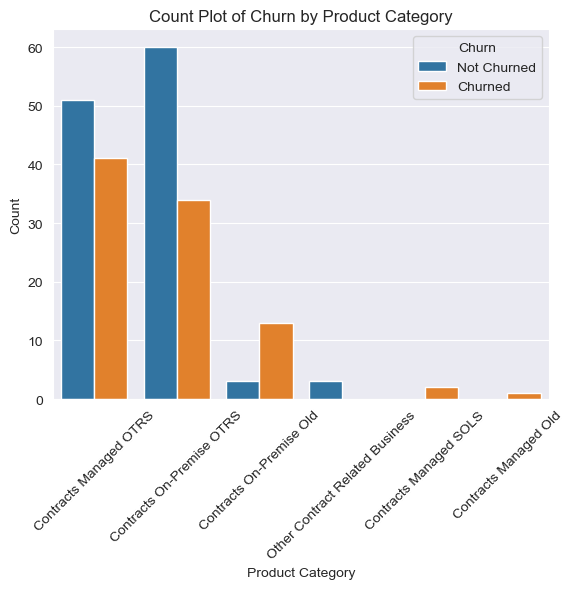

In [13]:
# For categorical columns, use bar plots or count plots grouped by churn.
# Example: contract_item_product_category vs. churn
sns.countplot(data=df, x='contract_item_product_category', hue='churn')
plt.title('Count Plot of Churn by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

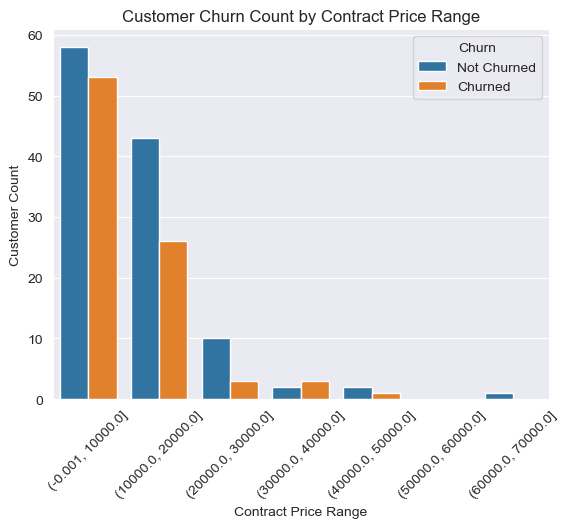

In [14]:
# Step 1: Create bins for contract price
df['contract_price_bin'] = pd.cut(
    df['concat_volume'], 
    bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], 
    include_lowest=True
)

# Step 2: Plot count plot
sns.countplot(data=df, x='contract_price_bin', hue='churn')
plt.title('Customer Churn Count by Contract Price Range')
plt.xlabel('Contract Price Range')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()